In [78]:
import pandas as pd
import numpy as np
from HullWhite import HullWhite
from scipy.optimize import fsolve
S = np.arange(0,11)
T = np.arange(0,10.5,0.5)
beta = np.array([1.879892, 0.579211, 	3.993992, 1.445091])
tau  = np.array([ 16.633491, 	0.319680])
reversion=0.13949636660880768 
volatility=0.017793899652989272
# HW = HullWhite(initial=0.02459103, reversion=0.03, volatility=0.00200, Gamma=1000, b=beta, tau=tau)
HW = HullWhite(initial=0.02459103, reversion=reversion, volatility=volatility, b=beta, tau=tau)
Kswap=fsolve(lambda x: HW.swap(0, S, T, x), x0=0.02)[0]
Kswpt=fsolve(lambda x: HW.swap(0, S+5, T+5, x), x0=0.02)[0]
time,float = HW.create_path(1/365,10,0)
swap = HW.swapextended(0, S, T, Kswap, floatRate=float, schedule=time)
swpt = HW.swaption(0, Te=5, S=S+5, T=T+5, K=Kswpt, floatRate=float, schedule=time)
simTable = pd.read_csv('SimulationTimes.txt')
simTable['Time'] = round(simTable['Time'],2)
simTable['CVACONF'] = round((simTable['CVAUB']/simTable['CVA']-1)*100,4)
simTable['DVACONF'] = round((simTable['DVALB']/simTable['DVA']-1)*100,4)
simTable['CVA'] = simTable['CVA']*1000000
simTable['DVA'] = simTable['DVA']*1000000
simTable['CVAUB'] = simTable['CVAUB']*1000000
simTable['CVALB'] = simTable['CVALB']*1000000
simTable['DVAUB'] = simTable['DVAUB']*1000000
simTable['DVALB'] = simTable['DVALB']*1000000

# simTable.drop(['CVAUB', 'CVALB', 'DVAUB', 'DVALB'], axis=1, inplace=True)
simTable['V0']=np.where('Swaption' in simTable['Product'], swpt, swap)
simTable.sort_values(['Product', 'dt'], ascending=True, inplace=True)
simTable.reset_index(drop=True, inplace=True)
simTable

,N,dt,CVA,CVAUB,CVALB,DVA,DVAUB,DVALB,Product,Time,CVACONF,DVACONF,V0
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.00,NaN,NaN,0.0
1,5000,1,5958.875621,6342.776528,5574.974714,-10588.576094,-9969.546269,-11207.605920,10Y Payer Swap Exposure,3.61,6.4425,5.8462,0.0
2,5000,2,6202.401228,6596.906346,5807.896111,-10060.553071,-9465.314240,-10655.791901,10Y Payer Swap Exposure,5.43,6.3605,5.9166,0.0
3,5000,4,6265.018460,6656.140324,5873.896595,-9411.684137,-8836.206294,-9987.161981,10Y Payer Swap Exposure,7.82,6.2429,6.1145,0.0
4,5000,12,6558.727793,6954.172058,6163.283527,-8565.293740,-8021.100376,-9109.487103,10Y Payer Swap Exposure,20.35,6.0293,6.3535,0.0
5,5000,52,6670.726153,7066.760552,6274.691753,-8404.457082,-7868.075133,-8940.839032,10Y Payer Swap Exposure,80.67,5.9369,6.3821,0.0
6,100000,365,6639.607754,6728.006226,6551.209283,-8203.506240,-8085.505870,-8321.506610,10Y Payer Swap Exposure,10111.11,1.3314,1.4384,0.0
7,5000,365,6516.469351,-6297.145923,-7684.630326,-8298.925499,-7670.813265,-8736.199215,10Y Payer Swap Exposure,519.76,-196.6343,5.2690,0.0
8,5000,1,332.812976,353.443569,312.182383,-413.066854,-386.950401,-439.183307,10Y Payer Swap with VM,4.11,6.1989,6.3226,0.0
9,5000,2,517.856634,551.237665,484.475603,-712.077411,-669.267685,-754.887138,10Y Payer Swap with VM,7.44,6.4460,6.0119,0.0


In [80]:
from joblib import load
EPE =  load("./SimulationData/PE_10Y_Swap_N=100000_dt=365.joblib")
ENE =  load("./SimulationData/NE_10Y_Swap_N=100000_dt=365.joblib")
EPE

array([0.        , 0.00162555, 0.0022995 , ..., 0.00184863, 0.00184909,
       0.        ])

<Axes: xlabel='dt', ylabel='CVAUB'>

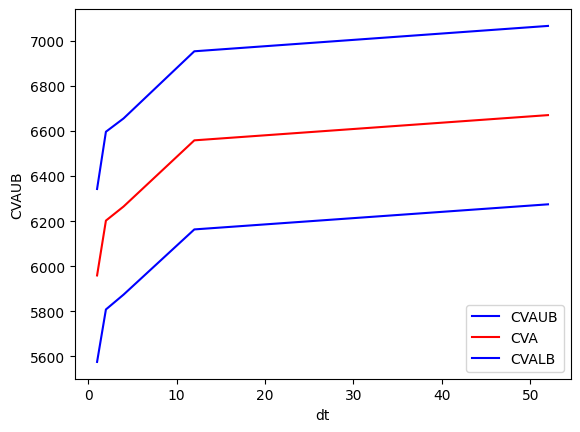

In [68]:
import seaborn as sns
sns.lineplot(x='dt', y='CVAUB', data=simTable.iloc[0:5], color='blue', label='CVAUB')
sns.lineplot(x='dt', y='CVA', data=simTable.iloc[0:5], color='red', label='CVA')
sns.lineplot(x='dt', y='CVALB', data=simTable.iloc[0:5], color='blue', label='CVALB')